In [25]:
import time
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
for i in range(50):
    driver.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))
    time.sleep(3)
    lst=driver.find_elements_by_css_selector(".jobTuple.bgWhite.br4.mb-8")
    
    for job in lst:
        driver.implicitly_wait(10)
        role=job.find_element_by_css_selector("a.title.fw500.ellipsis").text
        company=job.find_element_by_css_selector("a.subTitle.ellipsis.fleft").text
        location=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.location").text
        exp=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.experience").text
        skills=job.find_element_by_css_selector(".tags.has-description").text
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["experience"].append(exp)
        jobs["skills"].append(skills)

In [76]:
import pandas as pd
DS_jobs_df=pd.DataFrame(jobs)

In [71]:
DS_jobs_df.to_csv("DataScience_jobs.csv")

In [3]:
DS_jobs_df=pd.read_csv("DataScience_jobs.csv", index_col=0)
DS_jobs_df.tail(5)

,roles,companies,locations,experience,skills
1277,ML/AI Intern,AgNext Technologies ( India's leading Agri Tec...,"Mohali, Gurgaon",1-3 Yrs,Computer vision\ndeep learning\nC++\nImage pro...
1278,FR & D Scientist,Dr. Reddys Laboratories Ltd.,Hyderabad,3-7 Yrs,Product quality\nOperational excellence\nPharm...
1279,FR & D Scientist,Dr. Reddys Laboratories Ltd.,Hyderabad,2-5 Yrs,Product quality\nOperational excellence\nPharm...
1280,Analyst/senior Analyst - Fraud Analytics,bluCognition Private Limited,Pune,3-5 Yrs,Data Science\nPyspark\nR\nSAS SQL\nHive\nBig D...
1281,Python Developer,Diverse Lynx India Pvt. Ltd,Bengaluru,2-6 Yrs,Web services\nspark\nR Programming\nDatabase\n...


In [4]:
DS_jobs_df.isna().sum()

roles         0
companies     0
locations     0
experience    0
skills        3
dtype: int64

In [5]:
DS_jobs_df=DS_jobs_df.dropna()

In [6]:
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","roles","locations","skills"])].shape

(278, 5)

In [8]:
DS_jobs_df=DS_jobs_df.apply(lambda x: x.astype(str).str.lower())

DS_jobs_df.skills=[skill.split("\n") for skill in DS_jobs_df.skills]
DS_jobs_df.locations=[location.split(",") for location in DS_jobs_df.locations]
DS_jobs_df[15:20]

,roles,companies,locations,experience,skills
15,tomtom is hiring for senior data scientist,tomtom india private limited,[pune],8-12 yrs,"[pytorch, tensorflow, data science, object det..."
16,senior data scientist ( avp ) – leading financ...,hector and streak consulting pvt ltd,[bengaluru],7-10 yrs,"[data science, algorithms, artificial intellig..."
17,data scientist - bangalore mnc - c2h - webex i...,collabera technologies private limited,[bengaluru],7-12 yrs,"[tensorflow, data science, keras, data scienti..."
18,senior data scientist - artificial intelligenc...,change leaders,"[navi mumbai, mumbai]",3-7 yrs,"[data science, predictive modeling, nlp, data ..."
19,"data scientist, data science engineer required...",quickxpert infotech,"[mumbai suburbs, mumbai, thane]",0-5 yrs,"[python, oracle, oracle developer, ai, python ..."


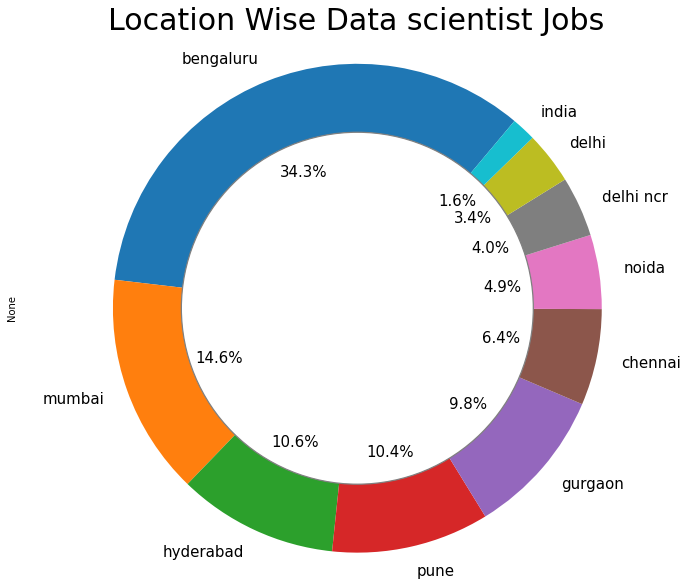

In [9]:
DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Data scientist Jobs",fontsize=30)

centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

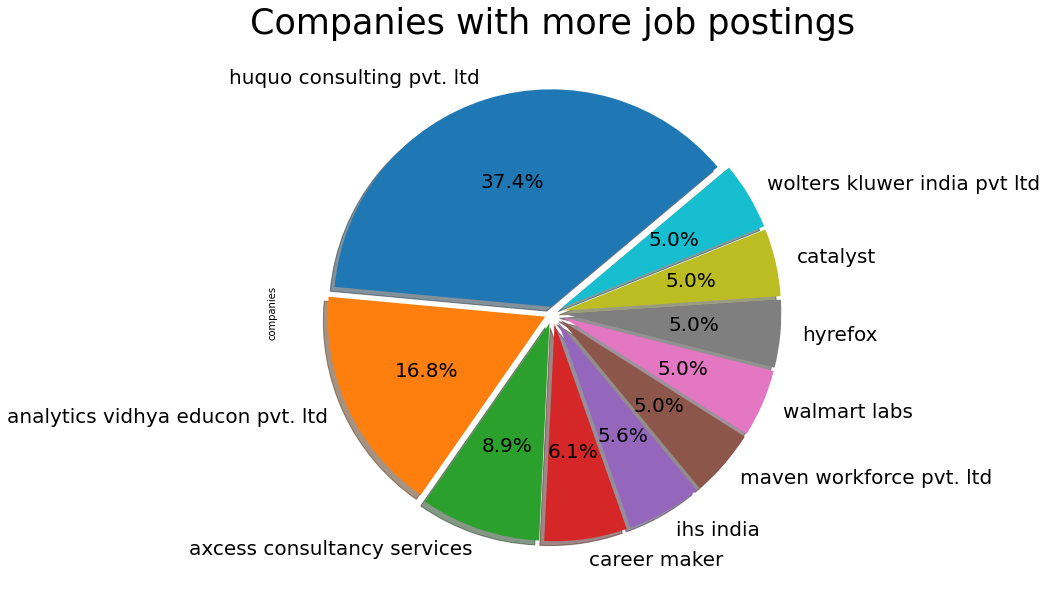

In [10]:
DS_jobs_df["companies"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Companies with more job postings",fontsize=35)
plt.show()

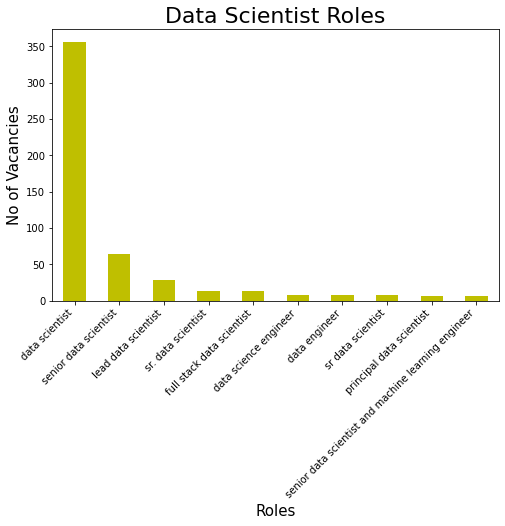

In [12]:
DS_jobs_df["roles"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")#(figsize=(10,10),explode=[0.05,0.04,0.05,0,0,0,0,0,0,0],shadow=True, startangle=50,autopct='%1.1f%%')
plt.xticks(rotation=45,ha='right')
plt.title("Data Scientist Roles",fontsize=22)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

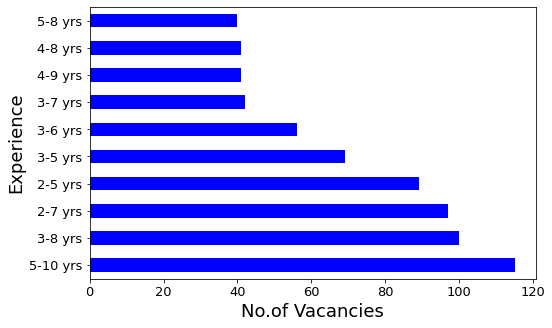

In [13]:
DS_jobs_df["experience"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")
plt.xlabel("No.of Vacancies",fontsize=18)
plt.ylabel("Experience",fontsize=18)
plt.show()

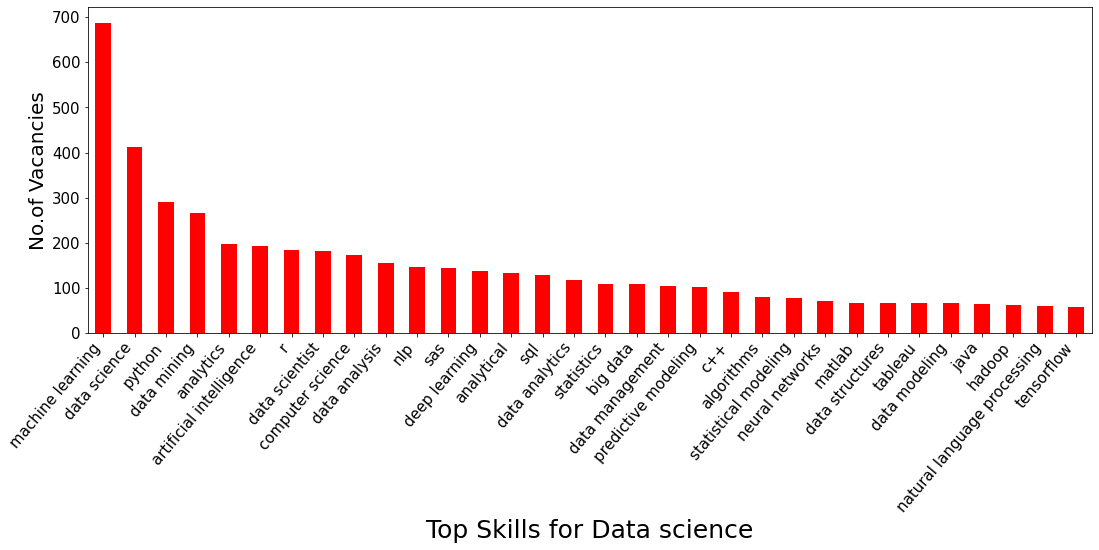

In [14]:
DS_jobs_df.skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Data science",fontsize=25)
plt.show()

In [15]:
jj=pd.DataFrame(DS_jobs_df.skills.apply(pd.Series).stack().value_counts()).reset_index()
jj.columns=["skills","count"]
jj.head()

,skills,count
0,machine learning,688
1,data science,412
2,python,290
3,data mining,266
4,analytics,197


In [16]:
datascience={}
datascience['statistics']=jj["count"][jj['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning']=jj["count"][jj['skills'].str.contains('machine |^ml', regex=True)].sum()
datascience['data_analysis']=jj["count"][jj['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining']=jj["count"][jj['skills'].str.contains('mining', regex=True)].sum()
datascience['nlp']=jj["count"][jj['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['computer_vision']=jj["count"][jj['skills'].str.contains('computer vision', regex=True)].sum()
datascience['deep_learning']=jj["count"][jj['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data']=jj["count"][jj['skills'].str.contains('big', regex=True)].sum()
from operator import itemgetter
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience

{'machine_learning': 723,
 'data_analysis': 331,
 'data_mining': 318,
 'statistics': 272,
 'nlp': 218,
 'deep_learning': 142,
 'big_data': 136,
 'computer_vision': 54}

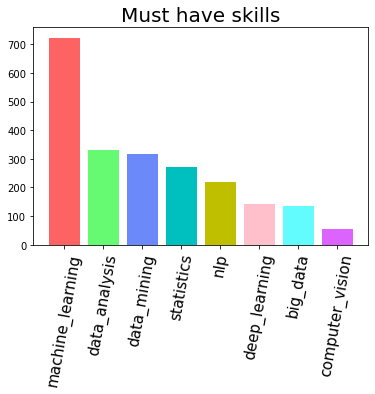

In [17]:
plt.bar(datascience.keys(),datascience.values(),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Must have skills",fontsize=20)
plt.show()

In [18]:
languages={}
languages["python"]=jj["count"][jj['skills'].str.contains('python', regex=True)].sum()
languages["r"]=jj["count"][jj['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=jj["count"][jj['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=jj["count"][jj['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=jj["count"][jj['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=jj["count"][jj['skills'].str.contains('sas', regex=True)].sum()

sql=jj[jj['skills'].str.contains('sql', regex=True)]
languages["sql"]=sql["count"][~sql['skills'].str.contains('no', regex=True)].sum()

languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

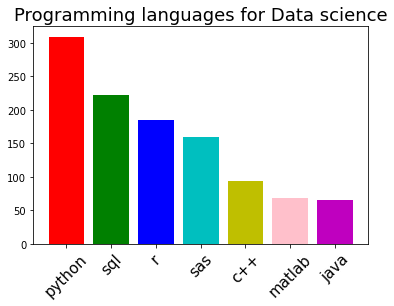

In [19]:
plt.bar(languages.keys(),languages.values(),color=["r","g","b","c","y","pink","m"])
plt.xticks(rotation=45,fontsize=15)
plt.title("Programming languages for Data science",fontsize=18)
plt.show()

### 3.5.3. Deep learning frameworks

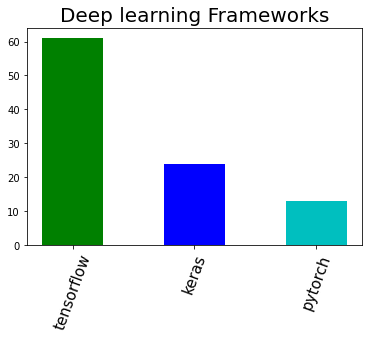

In [20]:
frameworks={}
frameworks['tensorflow']=jj["count"][jj['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=jj["count"][jj['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=jj["count"][jj['skills'].str.contains('torch', regex=True)].sum()
plt.bar(frameworks.keys(),frameworks.values(),color=["g","b","c"],width=.5)
plt.xticks(rotation=70,fontsize=15)
plt.title("Deep learning Frameworks",fontsize=20)
plt.show()

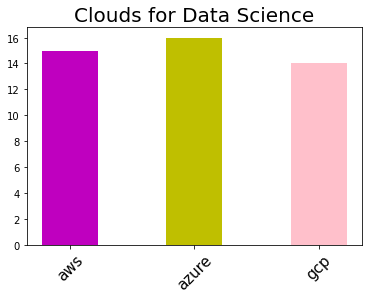

In [21]:
cloud={}
cloud['aws']=jj["count"][jj['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=jj["count"][jj['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=jj["count"][jj['skills'].str.contains('gcp')].sum()
plt.bar(cloud.keys(),cloud.values(),color=["m","y","pink"],width=.45)
plt.xticks(rotation=45,fontsize=15)
plt.title("Clouds for Data Science",fontsize=20)
plt.show()

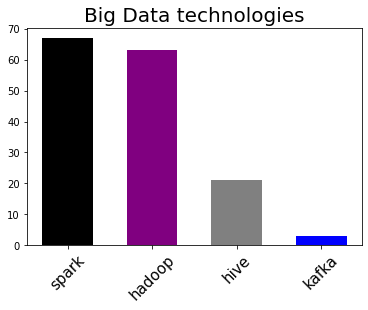

In [22]:
bigdata={}
bigdata["spark"]=jj["count"][jj['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=jj["count"][jj['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=jj["count"][jj['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=jj["count"][jj['skills'].str.contains('kafka', regex=True)].sum()

plt.bar(bigdata.keys(),bigdata.values(),color=["black","purple","grey","blue"],width=0.6)
plt.xticks(rotation=45,fontsize=15)
plt.title("Big Data technologies",fontsize=20)
plt.show()

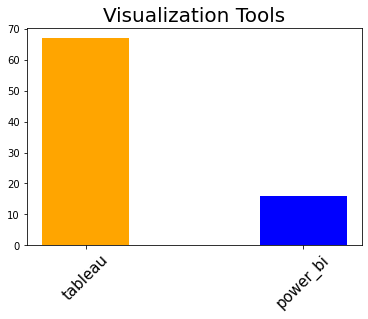

In [23]:
tools={}
tools["tableau"]=jj["count"][jj['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=jj["count"][jj['skills'].str.contains('power bi', regex=True)].sum()


plt.bar(tools.keys(),tools.values(),color=["orange","blue"],width=(0.4))
plt.xticks(rotation=45,fontsize=15)
plt.title("Visualization Tools",fontsize=20)
plt.show()